# The dataset

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

let's import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

Let's load the file and see what the data looks like.

In [2]:
fish = pd.read_csv('Fish.csv')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.shape

(159, 7)

Reporting data to know more details about it

In [5]:
ProfileReport(fish)

Number of variables,7
Number of observations,159
Total Missing (%),0.0%
Total size in memory,8.8 KiB
Average record size in memory,56.5 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [6]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
# knowing some descriptive statistic about data
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

After exploring the data, we found that there are seven types of best-selling fish are ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'] and there are strong relationships between



Length1 is highly correlated with Weight (ρ = 0.91571)


Length2 is highly correlated with Length1 (ρ = 0.99952)


Length3 is highly correlated with Length2 (ρ = 0.9941)

So let's explore each type of fish alone

# EDA

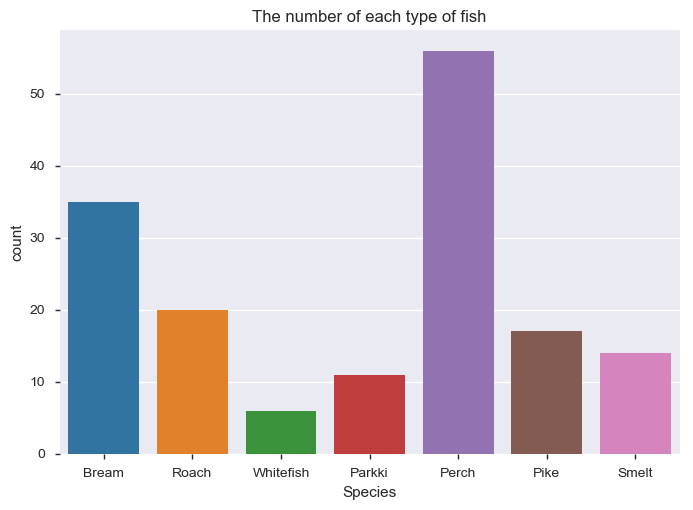

In [9]:
sns.countplot(fish['Species'])
plt.title('The number of each type of fish')
plt.show()

The type of fish that is called perch is the most numerous

The type of fish called white fish is the least numerous

let's show the distribution of Species 

In [10]:
def box(var):
    # this function take the variable and return a boxplot for each type of fish
    sns.boxplot(x="Species", y=var, data=fish,palette='rainbow')
    

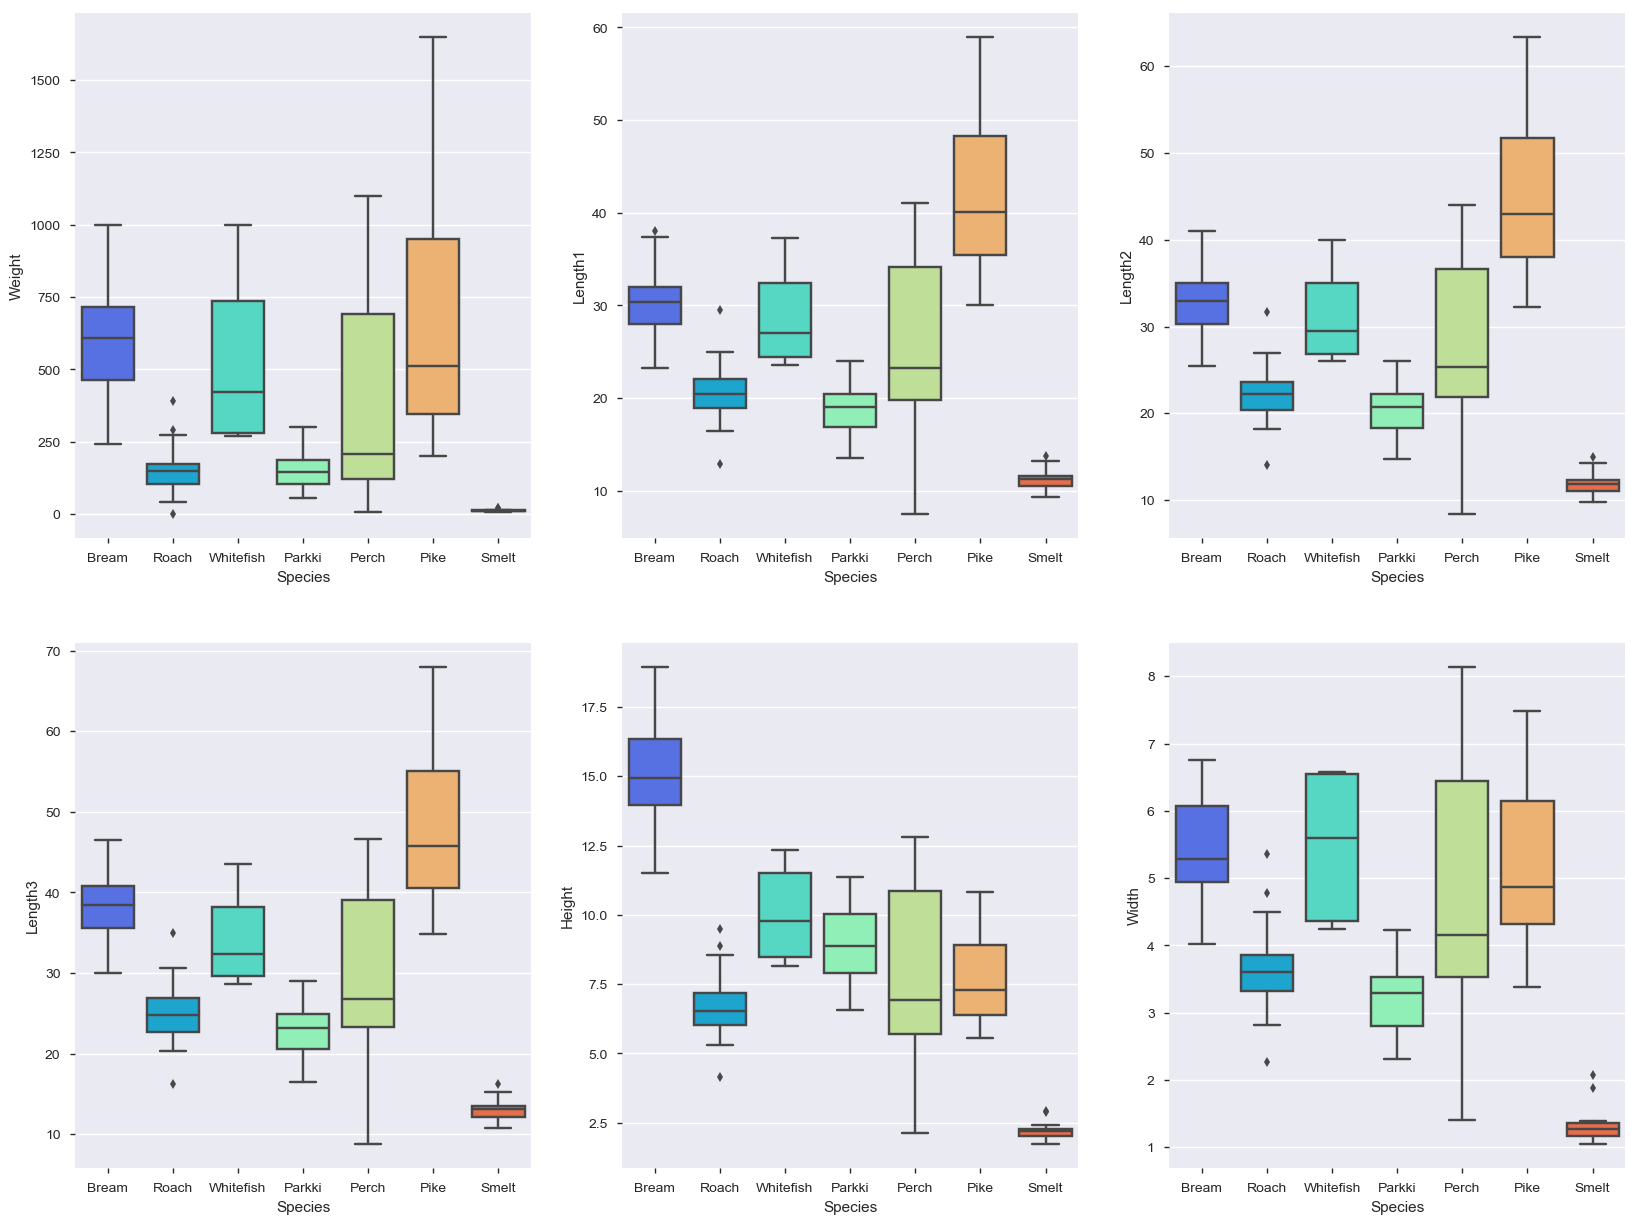

In [11]:
fig, ax = plt.subplots(2, 3,figsize=(20,15))
plt.subplot(2,3,1)
box('Weight')
plt.subplot(2,3,2)
box('Length1')
plt.subplot(2,3,3)
box('Length2')
plt.subplot(2,3,4)
box('Length3')
plt.subplot(2,3,5)
box('Height')
plt.subplot(2,3,6)
box('Width')

One of the reasons why prech is the best-selling fish type is that I have weights and lengths of different sizes that make it easy to pick your fluff out

# Now let's know more information about each type of fish

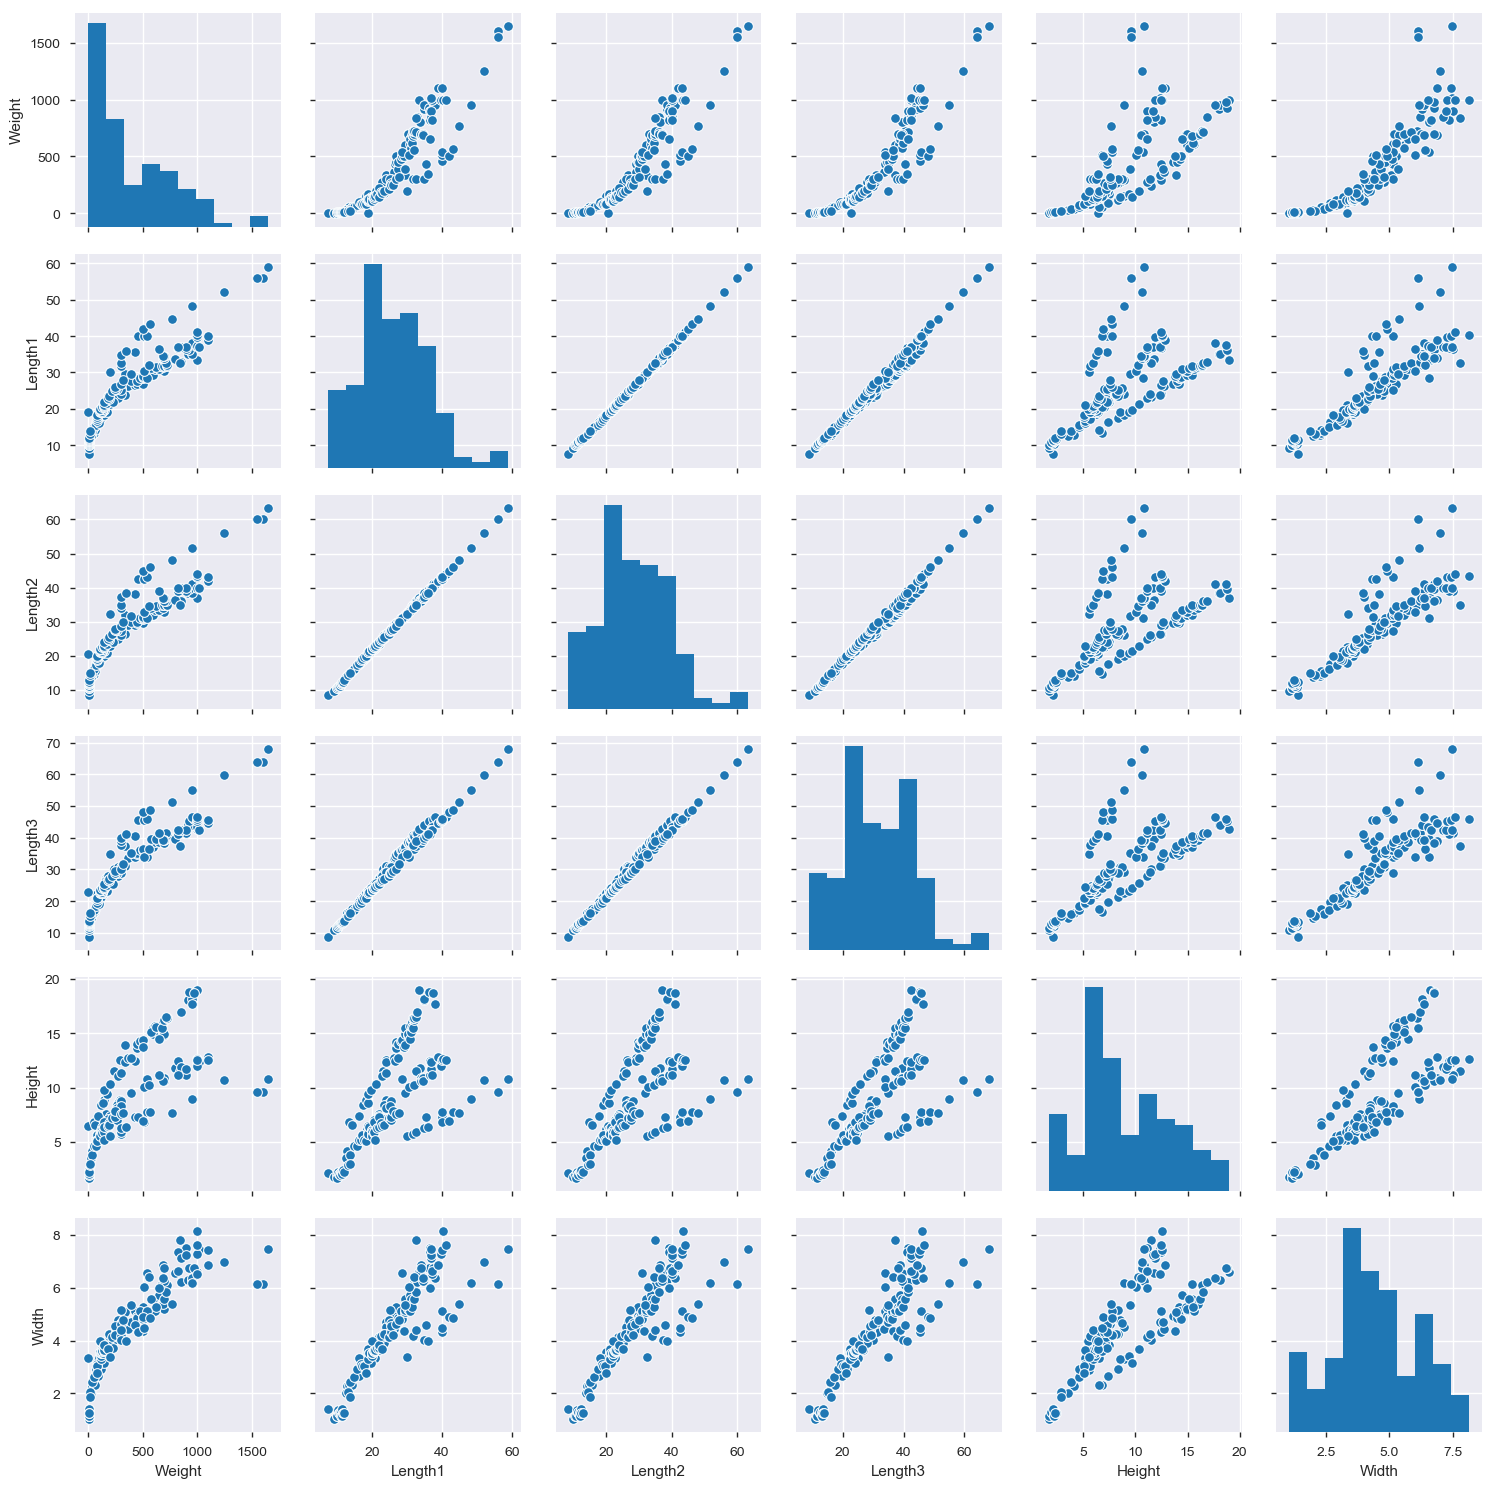

In [12]:
sns.pairplot(data=fish)

Text(0.5, 1.0, 'pairwise relationships in a dataset')

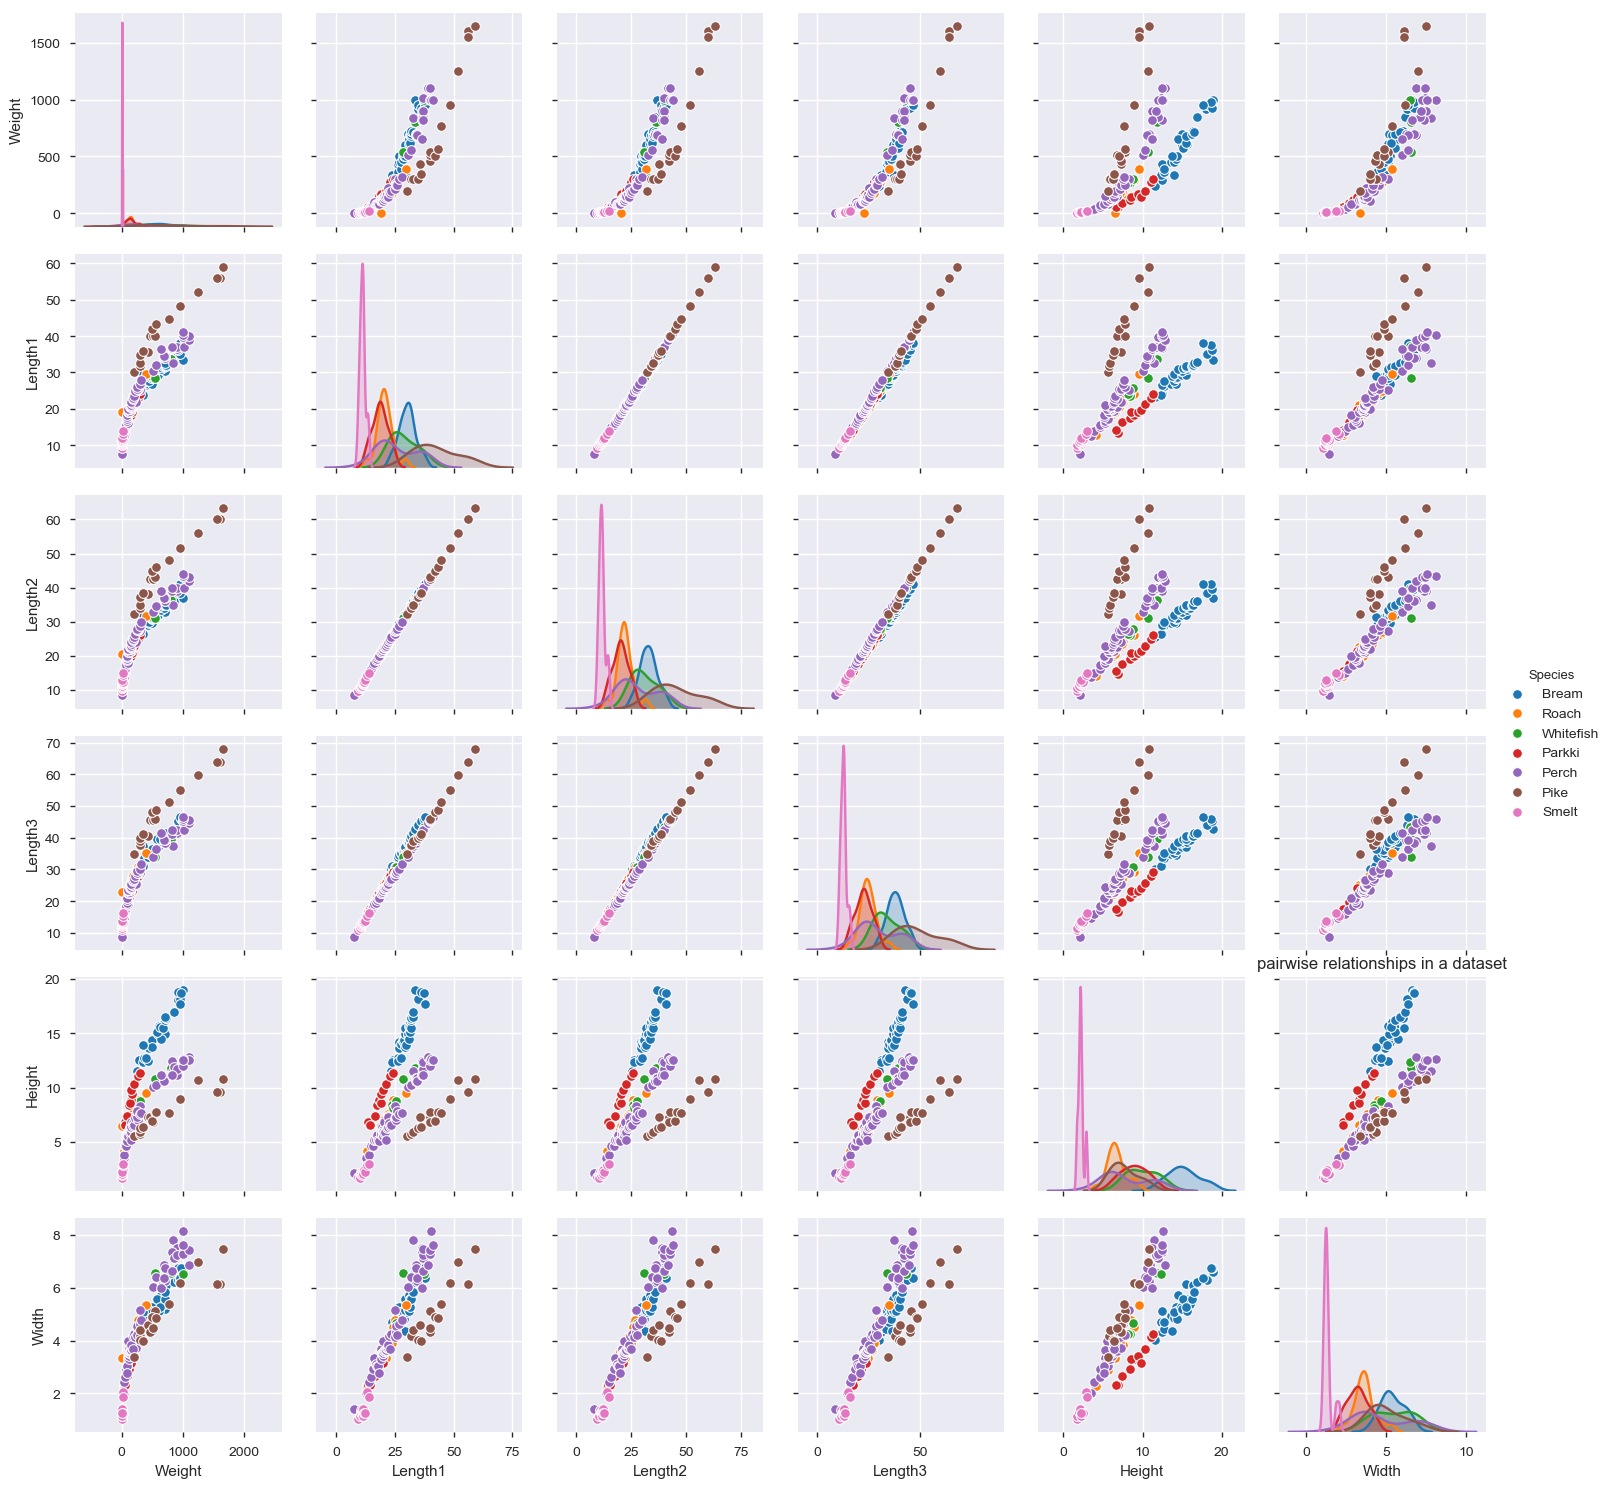

In [13]:
sns.pairplot(data=fish,hue='Species')
plt.title('pairwise relationships in a dataset')

## Now let's know the correlation between the variables

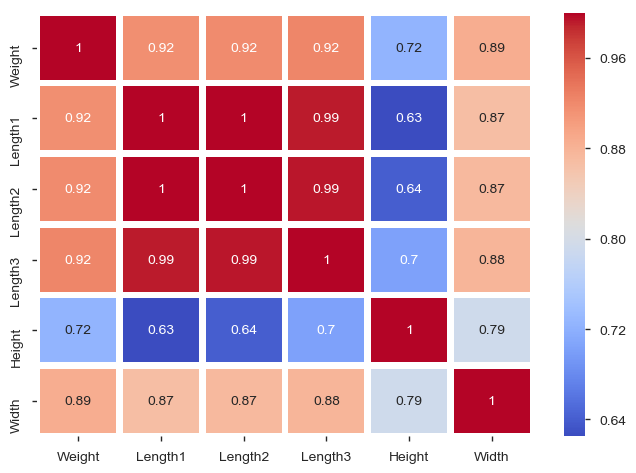

In [14]:
sns.heatmap(fish.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=4)

### We can see that there is a large correlation between variables, especially the longest, so we will drop them
Length1 is highly correlated with Weight (ρ = 0.91571)

Length2 is highly correlated with Length1 (ρ = 0.99952)

Length3 is highly correlated with Length2 (ρ = 0.9941)

In [15]:
fish.drop(['Length1','Length2','Length3'],axis=1,inplace=True)

In [16]:
fish.head()

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


# Prepare data before modeling it

### drop Outliers

In [17]:
fish.head()

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


In [18]:
filt_df = fish.iloc[:,1:]

In [19]:
#computing percentiles
low = .05
high = .95
quant_df = filt_df.quantile([low, high])
print(quant_df)

      Weight    Height    Width
0.05     9.8   2.20356  1.28314
0.95  1000.0  16.37732  7.28462


Next filtering values based on computed percentiles. To do that I use an apply by columns and that's it !

In [20]:
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

Bringing the athort columns back.

In [21]:
filt_df = pd.concat([fish.iloc[:,0], filt_df], axis=1)

In [22]:
filt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 4 columns):
Species    159 non-null object
Weight     138 non-null float64
Height     143 non-null float64
Width      143 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.2+ KB


In [23]:
filt_df.describe()

,Weight,Height,Width
count,138.000000,143.000000,143.000000
mean,355.100000,8.860080,4.420774
std,275.197384,3.621135,1.414811
min,9.900000,2.204400,1.283800
25%,130.000000,6.141150,3.525000
50%,271.000000,7.786000,4.248500
75%,564.250000,11.745600,5.362700
max,975.000000,16.361800,7.277200


### drop the missing value

In [24]:
fish =filt_df.dropna()

let's divide the data for the part that we want to estimate, and the other part is the variable we will use.

In [25]:
X = fish.drop('Weight',axis=1)
y=fish['Weight']

Since linear regression requires numerical variables and the genre variable is a categorical variable, we'll use a technique called one-hot encoding to convert the categorical variables to numerical. This technique transforms each category value into a new column and assigns a 1 or 0 to the column.

In [26]:
f_type =pd.get_dummies(X['Species'],drop_first=True)

In [27]:
f_type.head()

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [28]:
X.drop('Species',axis=1,inplace=True)

In [29]:
X = pd.concat([X,f_type],axis=1)

In [30]:
X.head()

,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,11.5200,4.0200,0,0,0,0,0,0
1,12.4800,4.3056,0,0,0,0,0,0
2,12.3778,4.6961,0,0,0,0,0,0
3,12.7300,4.4555,0,0,0,0,0,0
4,12.4440,5.1340,0,0,0,0,0,0


# Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [31]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test =train_test_split(X,y, test_size = 0.2 , random_state=4)

## Training the Model

Now its time to train our model on our training data!

In [32]:
from sklearn.linear_model import LinearRegression
#Create an instance of a LinearRegression() model named lm.
lm=LinearRegression()
# fit the model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Print out the coefficients and intercept of the model

In [33]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 41.41437272 110.05034804  63.9888966  139.39764546 314.32754163
 101.27447492 341.61420208  89.68836966]


In [34]:
print('intercept: \n',lm.intercept_)

intercept: 
 -627.6418833145058


Let me show you what the training data looks like

In [35]:
s=pd.DataFrame(X_train)
s.head()

,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
102,8.3230,5.1373,0,1,0,0,0,0
139,7.6800,5.3760,0,0,1,0,0,0
76,4.5880,2.9415,0,1,0,0,0,0
50,7.3968,4.1272,0,0,0,1,0,0
10,14.2628,5.1042,0,0,0,0,0,0


# Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [36]:
# Predicting the Test set results
predictions = lm.predict( X_test)


Text(0, 0.5, 'Predicted Y')

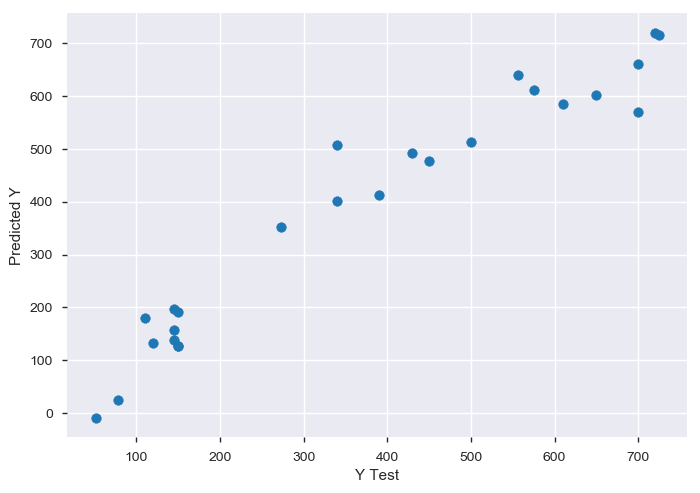

In [37]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [38]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 46.52038684452813
MSE: 3617.7963304110494
RMSE: 60.1481199241593


# Residuals

we should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

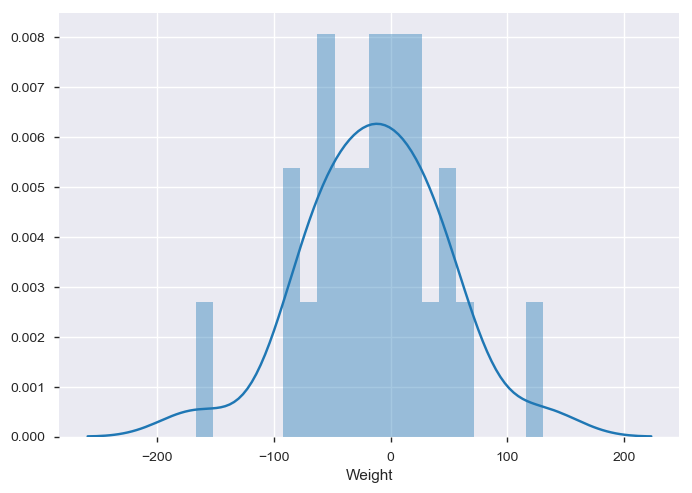

In [39]:
sns.distplot((y_test-predictions),bins=20);

In [41]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Height,41.414373
Width,110.050348
Parkki,63.988897
Perch,139.397645
Pike,314.327542
Roach,101.274475
Smelt,341.614202
Whitefish,89.688370


In [52]:
print('intercept: \n',lm.intercept_)

intercept: 
 -627.6418833145058


# The equation is:

h(X)= -627.64 + 41.41 Height + 110 Width + 63.98 Parkki + 139.397 Perch + 314.32 Pike + 101.27 Roach + 341.61 Smelt + 89.688 Whitefish